This Notebook will be used for the Coursera Capstone Project

In [150]:
import pandas as pd 

In [151]:
import numpy as np 

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
data_df = pd.read_csv ("Data-Collisions.csv")

In [154]:
data_df.shape

(194673, 38)

In [155]:
data_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Deleting columns that will not be used in the models

In [156]:
data_df = data_df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])


Converting columns to categories

In [157]:

data_df["WEATHER"] = data_df["WEATHER"].astype('category')
data_df["ROADCOND"] = data_df["ROADCOND"].astype('category')
data_df["LIGHTCOND"] = data_df["LIGHTCOND"].astype('category')


assigning variables for model analysis

In [159]:

data_df["WEATHER_CAT"] = data_df["WEATHER"].cat.codes
data_df["ROADCOND_CAT"] = data_df["ROADCOND"].cat.codes
data_df["LIGHTCOND_CAT"] = data_df["LIGHTCOND"].cat.codes

In [160]:
data_df.shape

(194673, 7)

In [161]:
data_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [162]:
data_df.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [163]:
data_df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [164]:
data_df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [165]:
data_df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [166]:
data_df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

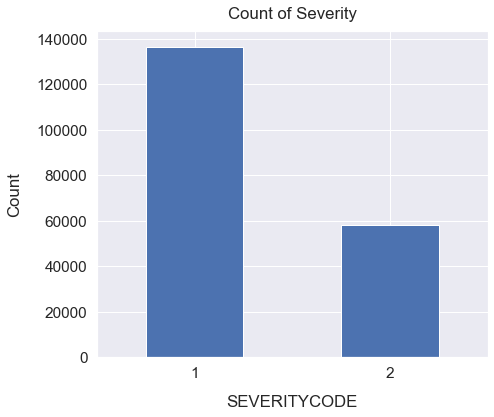

In [167]:
sns.set(font_scale=1.4)
bars = ('A', 'B')
bars = ('A', 'B')
data_df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("SEVERITYCODE", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Severity", y=1.02);

Downsampling the majority class to fixed unbalanced data

In [168]:
from sklearn.utils import resample

In [169]:
data_df_majority = data_df[data_df.SEVERITYCODE==1]
data_df_minority = data_df[data_df.SEVERITYCODE==2]

#Downsample majority class
data_df_majority_downsampled = resample(data_df_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
data_df_balanced = pd.concat([data_df_majority_downsampled, data_df_minority])

# Display new class counts
data_df_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

Model Preparation

In [170]:
import numpy as np
X = np.asarray(data_df_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [171]:
y = np.asarray(data_df_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Normalize the dataset

In [173]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

Train/Test Split

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


K-Nearest Neighbors (KNN)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [177]:
 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Kyhat))

Train set Accuracy:  0.5623166345457447
Test set Accuracy:  0.563973305072609


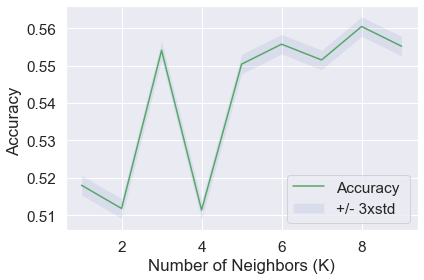

The best accuracy was with 0.5604502620800275 with k= 8


In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
      
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    Kyhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, Kyhat)

    
    std_acc[n-1]=np.std(Kyhat==y_test)/np.sqrt(Kyhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [180]:
dTree.fit (X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
predTree = dTree.predict(X_test)

In [182]:
print (predTree [0:5])
print (y_test [0:5])

[2 2 1 1 2]
[2 2 1 1 1]


In [183]:
print ("DecisionTrees's Accuracy:",metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy: 0.5593331996677455


Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:

LRyhat = LR.predict(X_test)
LRyhat

array([1, 2, 1, ..., 2, 2, 2], dtype=int64)

In [186]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57295252, 0.42704748],
       [0.47065071, 0.52934929],
       [0.67630201, 0.32369799],
       ...,
       [0.46929132, 0.53070868],
       [0.47065071, 0.52934929],
       [0.46929132, 0.53070868]])

Results & Evaluation

In [187]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

K-Nearest Neighbor

In [188]:
jaccard_similarity_score(y_test, Kyhat)

C:\Users\Michael Sheppler\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5551800189041332

In [189]:
f1_score(y_test, Kyhat, average='macro')

0.538772127771468

Decision Tree

In [190]:
jaccard_similarity_score(y_test, predTree)

C:\Users\Michael Sheppler\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5593331996677455

In [191]:
f1_score(y_test, predTree, average='macro')

0.4775118235605498

Logistic Regression

In [192]:
jaccard_similarity_score(y_test, LRyhat)

C:\Users\Michael Sheppler\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5260218256809784

In [193]:
f1_score(y_test, LRyhat, average='macro')

0.511602093963383

In [194]:
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6849535383198885